In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from icecream import ic

from sv_regression.sv_regression import SvRegression

# Fixing numpy random seed (used by sklearn) for reproducibility:
np.random.seed(seed=4242)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
name_dataset = "mtcars.csv"
num_features_retained = 10
path_dataset = os.path.join("data", name_dataset)
index_col = "model"
target = "mpg"

data_sv = pd.read_csv(path_dataset,
                      index_col=index_col)
data_sv = data_sv.iloc[:, :(num_features_retained + 1)]  # +1 to retain the target feature as well.

# # Counting the number of missing values per column.
# print(data_sv.isna().sum())

In [3]:
# Splitting dataset in features and target.
x_features = data_sv.drop(labels=target, axis=1)
y_target = data_sv[target]

nb_rows, nb_features = x_features.shape
print(f"{nb_rows} rows in the dataset.")
print(f"{nb_features} features in the dataset.")

32 rows in the dataset.
10 features in the dataset.


In [4]:
sv_reg = SvRegression(
    data=data_sv,
    #ind_predictors_selected=list(range(10)),
    ind_predictors_selected=[3, 7, 2, 5],
    target=target,
)

# Fitting the regression.
coeffs = sv_reg.fit()

# Coefficients without noise:
coeffs_sv_without_noise = sv_reg.coeffs

0 rows have been deleted due to missing values.
32 rows in the dataset.
10 features (regressors) present in the dataset.
4 features selected.


AssertionError: target_pred must be in predictors

In [6]:
    print("=" * 70)
    print("Per predictor Shapley value (normalized basis).")
    print(sv_reg.shaps)
    print("=" * 70)
    print("Coefficients of the SV regression (normalized basis).")
    print(sv_reg.coeffs_norm)
    print("=" * 70)
    print("Coefficients of the SV regression (unnormalized basis).")
    print("sv_reg.coeffs[0] --> intercept term.")
    print(sv_reg.coeffs)
    print("=" * 70)
    print("Checking that the Shapley Values sums up to the full model R^2.")
    print(sv_reg.check_norm_shap())
    print("=" * 70)

Per predictor Shapley value (normalized basis).
[0. 0. 0. 0.]
Coefficients of the SV regression (normalized basis).
[0. 0. 0. 0.]
Coefficients of the SV regression (unnormalized basis).
sv_reg.coeffs[0] --> intercept term.
[0. 0. 0. 0.]
Checking that the Shapley Values sums up to the full model R^2.
Computing the 16 linears regressions.
Linear regressions |█████████████████████████████████████▌⚠︎ | (!) 15/16 [94%] in 0.0s (406.71/s) 


IndexError: list index out of range

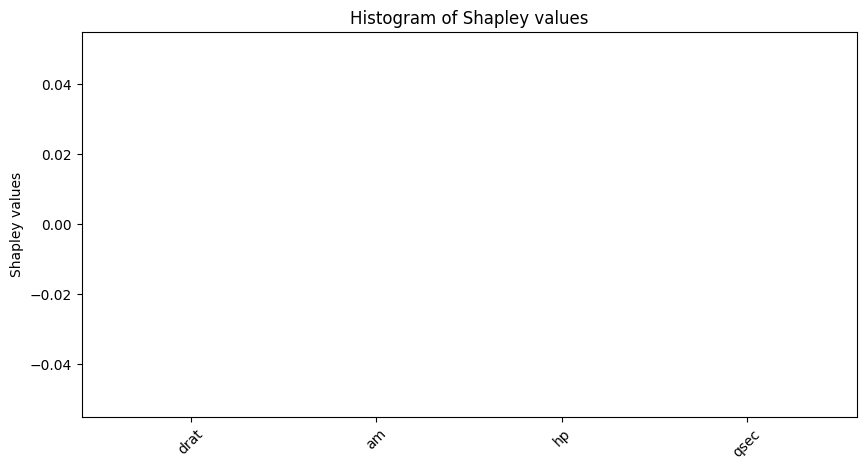

In [7]:
sv_reg.histo_shaps()